<h1>Exploration of a Lorenz System</h1>
<h2>Midterm Project</h2>
<h2>PHY 2200 - Spring 2023</h2>

### Introduction and overview

The Lorenz system is a set of three differential equations that yields chaotic solutions for specific inital conditions developed by Edward Lorenz in 1963. The concept of the "Butterfly Effect" is a more well-known application of the Lorenz system. The basic premise is that in a chaotic physical system without knowing the inital conditions, we will forever be unable to predict its future. This implies that deterministic systems can also be unpredictable. The three ordinary differential equations for this system are (also known as the Lorenz equations): 

$$\frac{dx}{dt} = \sigma(y-x)$$
$$\frac{dy}{dt} = x(\rho-z)-y$$
$$\frac{dz}{dt} = xy-\beta z$$

Here, the constants $\sigma, \rho, \beta$ are system parameters. In application, 

$\sigma$ represents the ratio of fluid viscosity to thermal conductivity,
$\rho$ represents the difference in temperature between the top and bottom of the system, and
$\beta$ represents the ratio of box width to box height.

Graphically, the system resembles the shape of a butterfly's wings. However, as $t$ increases, the point will never repeat a previous value; it will jump between the two "wings" of the butterfly. While the behavior of this system is chaotic, this "attraction" force between the two wings is known as a "strange attractor." 

Lorenz chose starting values of 
$$\sigma = 10$$
$$\rho = 28$$
$$\beta = \frac{8}{3}$$

which is what we will use to begin with. 

The goal of this project is to simulate this system with Lorenz's starting values and create phase space plots to depict the attractor as a function of time. After running the system with two different sets of inital conditions, we will show that a position at $t$ grows exponentially. Finally, we will find the exponential constant (Lyapunov exponent). 

### Calculation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

We will start with $t_{max} = 200$ to allow enough time to pass for the general Lorenz shape to appear, and `N=10000` to allow one hundred steps per second. If we increase $t_{max}$, the general shape of the Lorenz figure will be unclear. 

Below are the parameter definitions and initial conditions.

In [2]:
N = 10000
tmax = 200
t = np.linspace(0,tmax,N)
dt = t[1]-t[0]

σ = 10
ρ = 28
β = 8/3

#initial conditions: 
case1 = np.array( [1.0,1.0,1.0] )
case2 = np.array( [.75, .5,.25] )

Next, we will create empty arrays for our position and time.

In [3]:
time = np.zeros([])
x = np.zeros([])
y = np.zeros([])
z = np.zeros([])

Now we need to define a function to return the derivatives of the system. This function will be used by the `RK4()` method and we should list any parameters as inputs. We will be using the `RK4` approach because it will give us more accuracy in our data.

In [4]:
def deriv(arr,t):
    x = arr[0]
    y = arr[1]
    z = arr[2]
    return np.array( [ σ*(y-x), x*(ρ-z)-y, (x*y)-(β*z) ] )

In this function, `arr` is an array of our starting conditions.

Then we can use the RK4 method for each `x`, `y`, and `z` coordinate.

In [5]:
t=0
while (t <= tmax):
    # update our arrays from earlier
    time = np.append(time, t)
    x = np.append(x, case1[0])
    y = np.append(y, case1[1])
    z = np.append(z, case1[2])
    
    # below is RK4
    k1 = dt*deriv(case1,t)
    k2 = dt*deriv(case1+(.5*k1),t+(.5*dt))
    k3 = dt*deriv(case1+(.5*k2),t+(.5*dt))
    k4 = dt*deriv(case1+    k3 ,t +   dt)
    
    case1 += (k1+(2*k2)+(2*k3)+k4)/6
    t += dt

Now with the solution in hand, we can plot various variables to explore the dynamics.

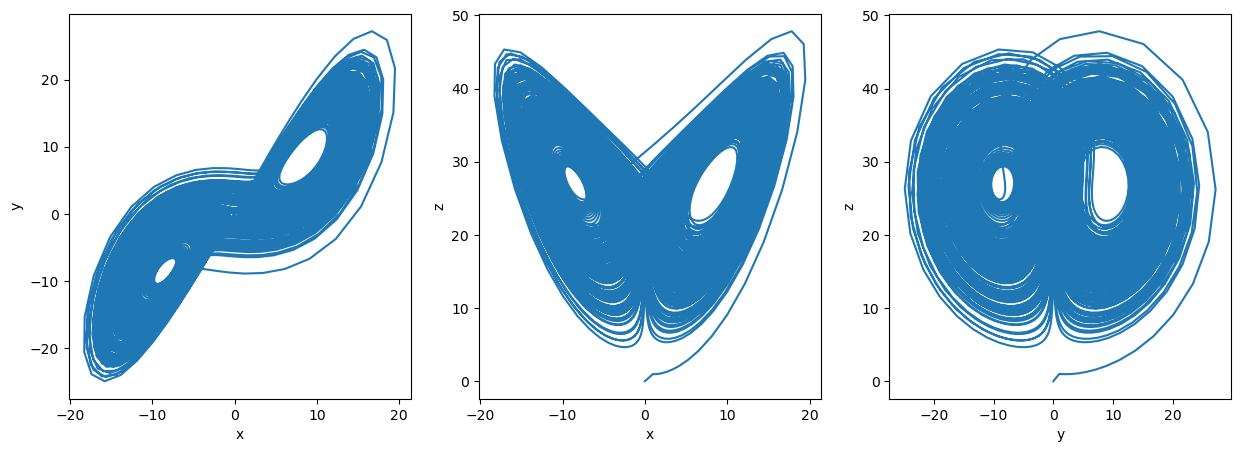

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))

ax1.plot(x,y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x,z)
ax2.set_xlabel('x')
ax2.set_ylabel('z')

ax3.plot(y,z)
ax3.set_xlabel('y')
ax3.set_ylabel('z')

plt.show()

Looking at the plot showing `x` vs `z`, you can see the general butterfly shape of the system. Below is a 3D graph of the system, followed by an animation.

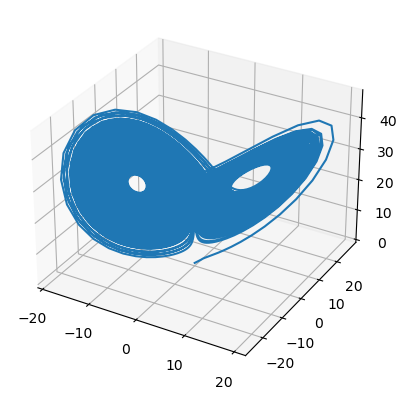

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(x,y,z)

plt.show()

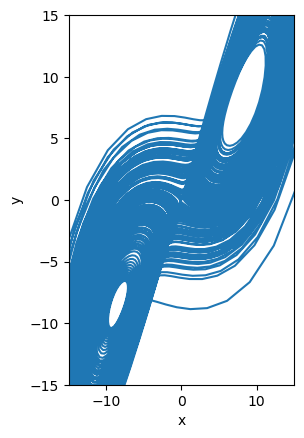

In [8]:
from time import sleep # To set the animation frame rate 
from IPython.display import clear_output # To redraw

for n in range(0,int(N/100)):
    sleep(.001) # Sets the maximum animation speed
    
    plt.subplot(1,2,1)
    plt.plot(x[0:100*n],y[0:100*n])
    plt.plot(x[100*n],y[100*n])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-15,15)
    plt.ylim(-15,15)
   
    clear_output(wait=True)
    plt.show()

A neat thing about this system is that it is known to exhibit chaos, meaning it is extremely sensitive to inital conditions. Let's try running this system again, but changed the inital conditions slightly. This time, we will use a `tmax = 50`, so we can better see the shape of the system.

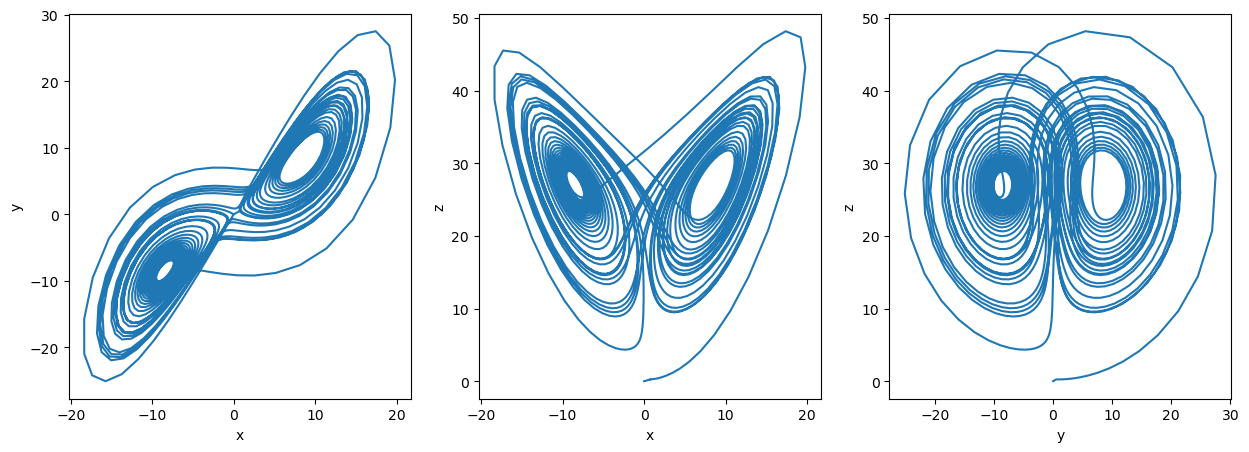

In [9]:
# --------------
# reset arrays to 0
t = x = y = z = 0

# RK4 
while (t <= 40):
    # update our arrays from earlier
    time = np.append(time, t)
    x = np.append(x, case2[0])
    y = np.append(y, case2[1])
    z = np.append(z, case2[2])
    
    # below is RK4
    k1 = dt*deriv(case2,t)
    k2 = dt*deriv(case2+(.5*k1),t+(.5*dt))
    k3 = dt*deriv(case2+(.5*k2),t+(.5*dt))
    k4 = dt*deriv(case2+    k3 ,t +   dt)
    
    case2 += (k1+(2*k2)+(2*k3)+k4)/6
    t += dt
    
# --------------
# plotting
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15, 5))

ax1.plot(x,y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.plot(x,z)
ax2.set_xlabel('x')
ax2.set_ylabel('z')

ax3.plot(y,z)
ax3.set_xlabel('y')
ax3.set_ylabel('z')

plt.show()

In this case, the intial conditions still gravitated towards Lorenz's "strange attractor."

### Exponential Growth

The code we wrote is a good chunk of space. Fortunately, we can condense it using the `solve_ivp` function from the `scipy.integrate` library.

Next, we will show that $$|x_{1}(t)-x_{2}(t)|$$ grows exponentially.

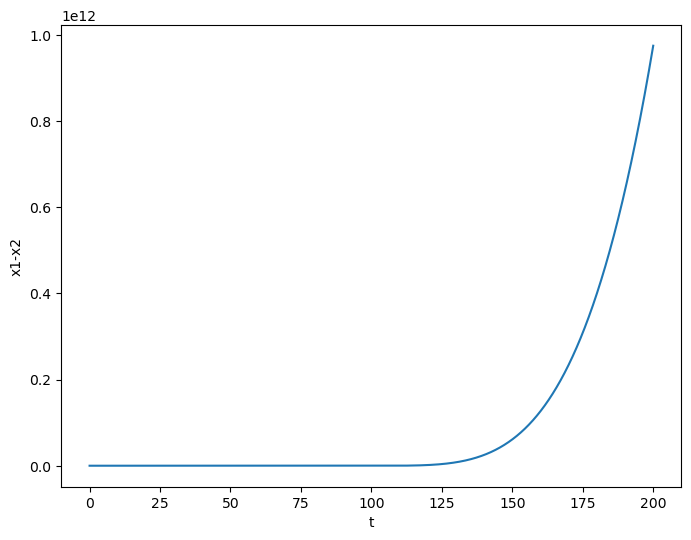

In [13]:
from scipy.integrate import solve_ivp # library with the function

# reset arrays to start
x = y = z = 0
t = np.linspace(0,tmax,N)

# redefine
def deriv(t,case,σ,ρ,β):
    x = case[0]
    y = case[1]
    z = case[2]
    return np.array( [ σ*(y-x), x*(ρ-z)-y, (x*y)-(β*z) ] )

# use function to find values
#                        here we use t=100 -> we only need a small snippet
sol = solve_ivp(deriv,[0,100],case1,args=(σ,ρ,β),dense_output=True)
X = sol.sol(t)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(t,np.abs(X[0]-X[1]))
ax.set_xlabel('t')
ax.set_ylabel('x1-x2')

plt.show()

where `dense_output` is a boolean value that tells `solve_ivp` whether to compute a continuous solution or not. Since we want the solver to return a function that can be used to determine a solution at any time, we set this to `True`. 

Why does this calculation matter? The Lorenz system gradually grows outward as `t` goes to infinity. Each iteration of `x[t+1]` may not always be greater than `x[t]`. The general idea of chaos and its appearance in this system is that physical systems can be both deterministic and unpredictable. 

Veritasium has a nice video discussing chaos, and talks about the Lorenz system [here](https://youtu.be/fDek6cYijxI). 

### The Lyapunov Exponent

The Lyapunov Exponent is essentially the growth rate of a system. It is a value that measures how quickly a distance between two states grows over time. 

To find it, we first need to just slightly adjust one of our previous initial conditions, and we will asign it to a new condition.

In [21]:
caseL = case1+1e-8 * np.random.randn(3)

where `np.random.randn(3)` will generate a new initial condition array (of size 3) based off of the adjusted original. This way, our new condition will be slightly more different than it was.

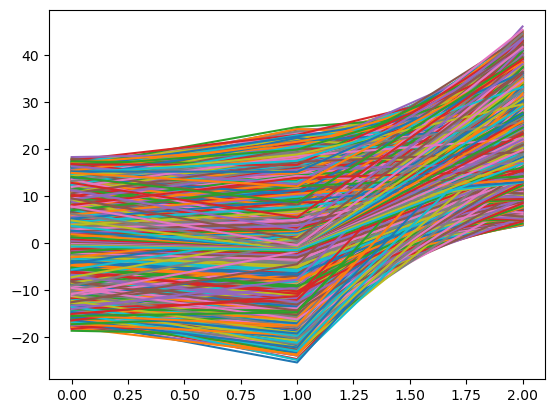

In [27]:
solL = solve_ivp(deriv,[0,tmax],caseL,args=(σ,ρ,β),dense_output=True)
XL = solL.sol(t)

plt.plot(XL)
plt.show()

This colorful mess is our system, and an example of what extreme initial conditions will do in this system.

This by itself is not useful to us. We must first calculate the distances between two trajectories at each time step. To do this, we will use the `np.linalg.norm()` function. We will be comparing (specifically finding the difference between) our current initial condition set `XL` with our previous one `X`.

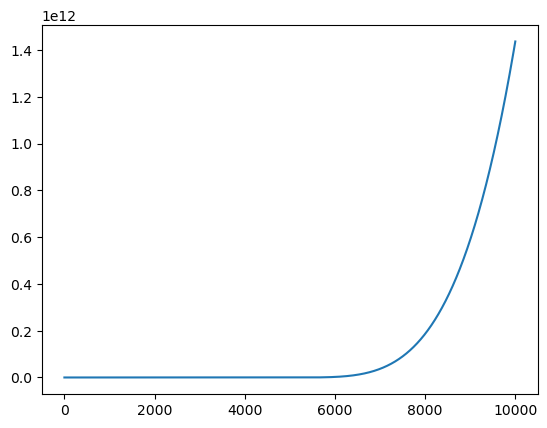

In [30]:
distances = np.linalg.norm(X-XL,axis=0)

plt.plot(distances)
plt.show()

This graph should look pretty familiar, because we found something similar previously. To find the Lyapunov exponent, take the natural logarithm of the distances using `np.log()` and fit a straight line to find the slope using `polyfit()`, which gives us the average exponential growth rate of the distances.

In [34]:
slope, intercept = np.polyfit(t,np.log(distances),1)

Finally, we divide the slope we found and divide it by our delta, in this case, `1e-8`. 

In [36]:
print(slope/1e-8)

20269189.35624489


Thus, we have the Lyapunov exponent of this system.